In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy


In [2]:
path = r'/Users/vineetasinha/Documents/dataanalytics/tasks/Data-Immersion/Achievement4/Instacart_Basket_Analysis'

In [3]:
path

'/Users/vineetasinha/Documents/dataanalytics/tasks/Data-Immersion/Achievement4/Instacart_Basket_Analysis'

# Importing the most up-to-data project data

In [4]:
df_project_data=pd.read_pickle(os.path.join(path,'02_Data','Prepared_Data','Cust_ord_prod.pkl'))

In [5]:
df_project_data.shape

(1000000, 34)

In [6]:
df_project_data.isnull().sum()

Unnamed: 0                       0
product_id                       0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
order_id                         0
User_id                          0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order       66205
add_to_cart_order                0
reordered                        0
_merge                           0
price_range_loc                  0
Busiest Day                      0
Busiest & Slowest Days           0
Busiest Period of the Day        0
max_order                        0
loyalty_flag                     0
Average Price/order              0
Spending_Flag                    0
Regularity                    8192
Order_Frequency_Flag             0
First Name                   55058
Last Name                        0
State                            0
Age                 

In [7]:
df_project_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Unnamed: 0                 1000000 non-null  int64   
 1   product_id                 1000000 non-null  int64   
 2   product_name               1000000 non-null  object  
 3   aisle_id                   1000000 non-null  int64   
 4   department_id              1000000 non-null  int64   
 5   prices                     1000000 non-null  float64 
 6   order_id                   1000000 non-null  int64   
 7   User_id                    1000000 non-null  int64   
 8   order_number               1000000 non-null  int64   
 9   order_dow                  1000000 non-null  int64   
 10  order_hour_of_day          1000000 non-null  int64   
 11  days_since_prior_order     933795 non-null   float64 
 12  add_to_cart_order          1000000 non-null  int64   
 13

# Bar Chart

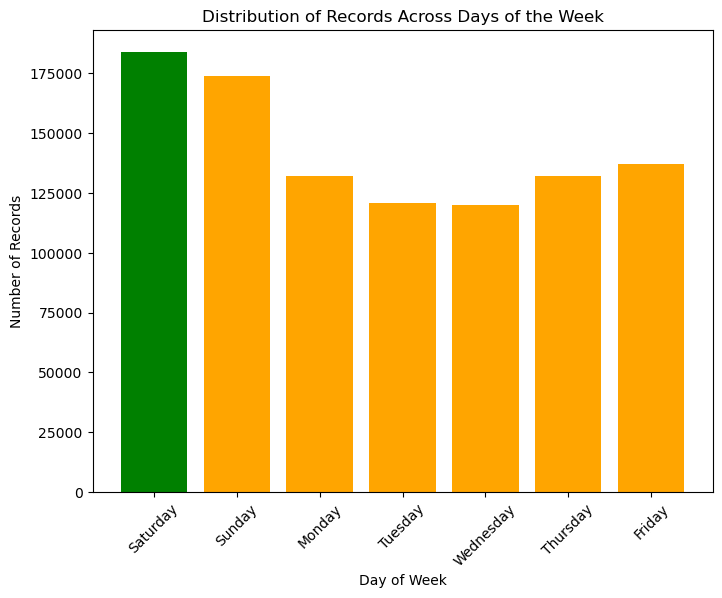

In [48]:
#Grouping data by 'dayOfWeek' and counting the number of records
grouped_data = df_project_data.groupby('order_dow').size().reset_index(name='count')

# Finding the index of the highest count
max_count_index = grouped_data['count'].idxmax()

# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Assigning different colors to bars, highlighting the highest count with a different color
colors = ['orange' if i != max_count_index else 'green' for i in range(len(grouped_data))]

plt.bar(grouped_data['order_dow'], grouped_data['count'], color=colors)

# Adding labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Records')
plt.title('Distribution of Records Across Days of the Week')

# Setting x-axis ticks and labels
plt.xticks(range(7), ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [9]:
#Exporting bar graph

bar.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','bar_order_dow.png'))

# Histogram

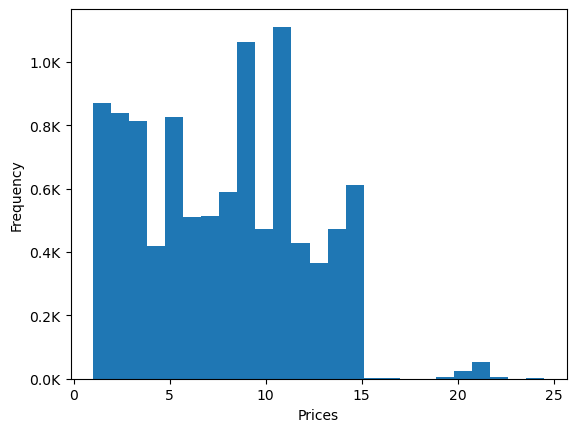

In [10]:
# Creating a histogram chart

hist = df_project_data['prices'].plot.hist(bins=25)
hist.set(xlabel='Prices')
hist.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/100000,'1.1f')+'K'))

In [11]:
#Exporting Histogram

hist.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Histogram_price_distribution.png'))

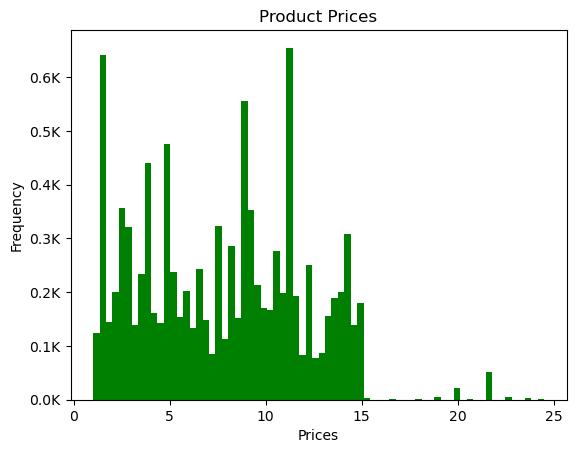

In [12]:
hist = df_project_data['prices'].plot.hist(bins=70, color='green')
hist.set(xlabel='Prices')
plt.title('Product Prices')
hist.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/100000,'1.1f')+'K'))

In [13]:
#Exporting histogram with increased bin frequency

hist.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Histogram_price_distribution1.png'))

In [14]:
df_project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Unnamed: 0                 1000000 non-null  int64   
 1   product_id                 1000000 non-null  int64   
 2   product_name               1000000 non-null  object  
 3   aisle_id                   1000000 non-null  int64   
 4   department_id              1000000 non-null  int64   
 5   prices                     1000000 non-null  float64 
 6   order_id                   1000000 non-null  int64   
 7   User_id                    1000000 non-null  int64   
 8   order_number               1000000 non-null  int64   
 9   order_dow                  1000000 non-null  int64   
 10  order_hour_of_day          1000000 non-null  int64   
 11  days_since_prior_order     933795 non-null   float64 
 12  add_to_cart_order          1000000 non-null  int64   
 13

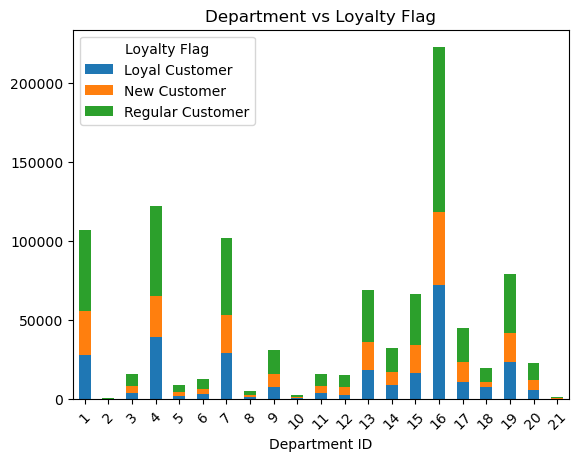

In [15]:
#df_project_data.set_index('product_name', inplace=True)
# Group by department_id and loyalty_flag and count occurrences
grouped_df = df_project_data.groupby(['department_id', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting
grouped_df.plot(kind='bar', stacked=True)
plt.title('Department vs Loyalty Flag')
plt.xlabel('Department ID')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Flag')
plt.show()


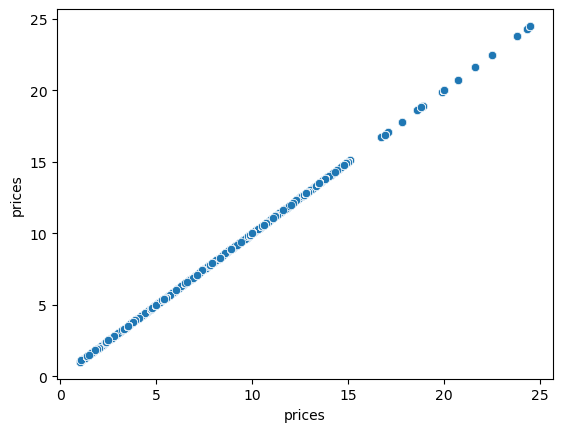

In [16]:
# Creating a scatterplot graph

scatter = sns.scatterplot(x='prices', y='prices', data=df_project_data)

In [17]:
#Exporting Scatterplot graph

scatter.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Scatterplot.png'))

# Line Chart

In [18]:
# Creating a line chart

df_project_data.shape

(1000000, 34)

# Spliting the dataframe into 70/30 split

In [19]:
np.random.seed(4)

In [20]:
dev = np.random.rand(len(df_project_data))<=0.7

In [21]:
dev

array([False,  True, False, ..., False,  True, False])

In [22]:
#Storing 70% in the big dataframe
#Storing 30% in the small dataframe

big = df_project_data[dev]
small = df_project_data[~dev]

In [23]:
len(df_project_data)

1000000

In [24]:
len(big) + len(small)

1000000

In [25]:
df_2 = small[['order_dow','prices']]

/Users/vineetasinha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vineetasinha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Order during weekday')]

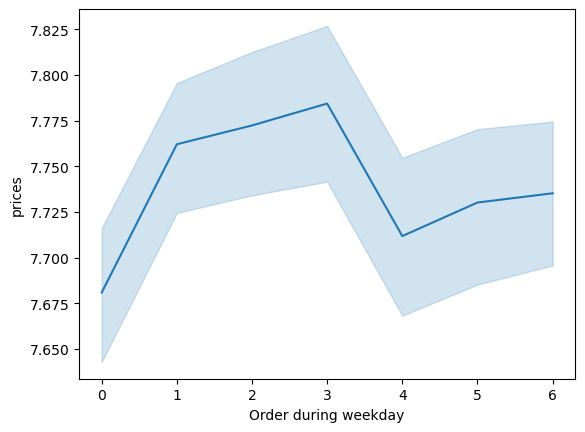

In [26]:
line = sns.lineplot(data = df_2, x='order_dow', y='prices')
line.set(xlabel='Order during weekday')

In [27]:
#Exporting Linechart

line.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','LineChart.png'))

[Text(0.5, 4.444444444444445, 'Maximum Order Hour Of Day')]

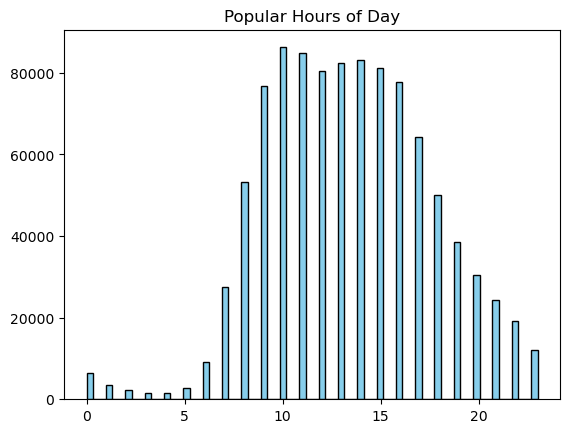

In [65]:


#max_count_index = grouped_data['count'].idxmax()

#colors = ['orange' if i != max_count_index else 'green' for i in range(len(grouped_data))]

#plt.hist(grouped_data['order_hour_of_day'], grouped_data['count'], color=colors, bins=70)


#n,bins,hist1 = df_project_data['order_hour_of_day'].plot.hist(bins=70, color='orange')
n, bins, patches = plt.hist(df_project_data['order_hour_of_day'], bins=70, color='skyblue', edgecolor='black')
plt.title('Popular Hours of Day')
hist1.set(xlabel='Maximum Order Hour Of Day')


# Observation - Maximum orders are made during 10am to 3pm

In [29]:
#Exporting Histogram with max order at specific hour of day

hist1.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Histogram_order_hour_distribution.png'))

[Text(0, 0.5, '')]

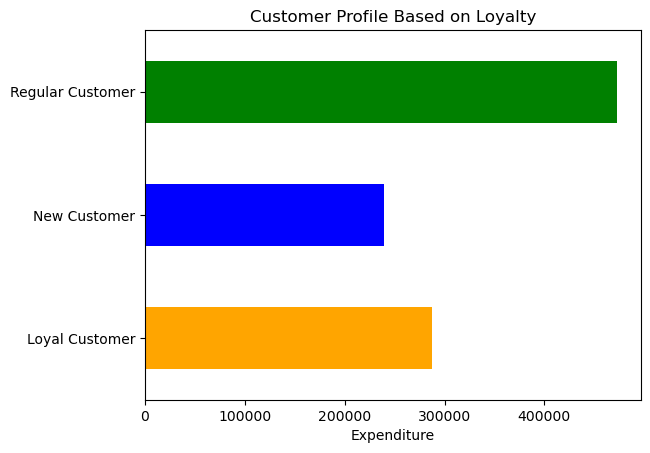

In [30]:
bar1 = df_project_data['loyalty_flag'].value_counts().sort_index().plot.barh(color=['orange','blue','green'])
plt.title('Customer Profile Based on Loyalty')
bar1.set(xlabel='Expenditure')
bar1.set(ylabel='')

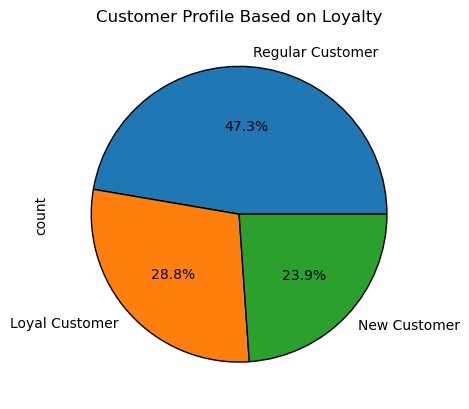

In [31]:
plt.title('Customer Profile Based on Loyalty')
pie1 = df_project_data['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%', subplots=True, figsize=(8, 4), wedgeprops = {'edgecolor':'black'})


In [32]:
#Exporting Bargraph showing customer loyality

bar1.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Bargraph_loyality.png'))

In [33]:
df_project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Unnamed: 0                 1000000 non-null  int64   
 1   product_id                 1000000 non-null  int64   
 2   product_name               1000000 non-null  object  
 3   aisle_id                   1000000 non-null  int64   
 4   department_id              1000000 non-null  int64   
 5   prices                     1000000 non-null  float64 
 6   order_id                   1000000 non-null  int64   
 7   User_id                    1000000 non-null  int64   
 8   order_number               1000000 non-null  int64   
 9   order_dow                  1000000 non-null  int64   
 10  order_hour_of_day          1000000 non-null  int64   
 11  days_since_prior_order     933795 non-null   float64 
 12  add_to_cart_order          1000000 non-null  int64   
 13

In [34]:
df_small = small[['order_hour_of_day', 'prices']]
df_small.head(5)

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,21,9.0
10,21,3.9


/Users/vineetasinha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vineetasinha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Spending Per Hour')

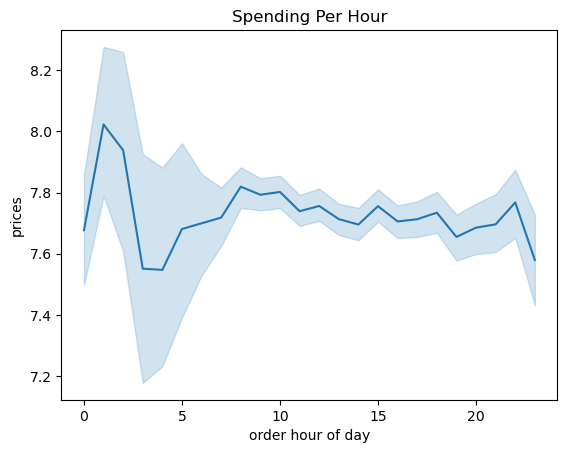

In [66]:
line1 = sns.lineplot(data = df_small, x='order_hour_of_day', y='prices')
line1.set(xlabel='order hour of day')
plt.title('Spending Per Hour')

# Observation - expenditure is high at 12am-4am

In [36]:
#Exporting Linegraph showing expenditure hour

line1.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Linegraph_expenditure_hour.png'))

In [37]:
df_age_dep = small[['Age', 'Total_Dependants']]


/Users/vineetasinha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vineetasinha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0.5, 'Total Dependants')]

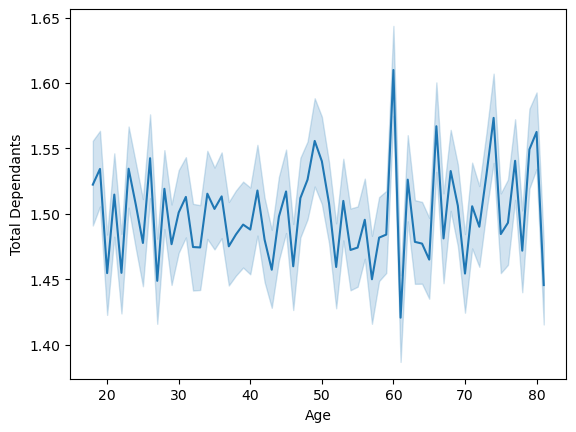

In [38]:
line = sns.lineplot(data = df_age_dep, x='Age', y='Total_Dependants')
line.set(xlabel='Age')
line.set(ylabel='Total Dependants')

In [39]:
#Exporting Linegraph with age and dependants


line.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Linegraph_age_dependants.png'))

In [40]:
df_age_income = small[['Age', 'Income']]

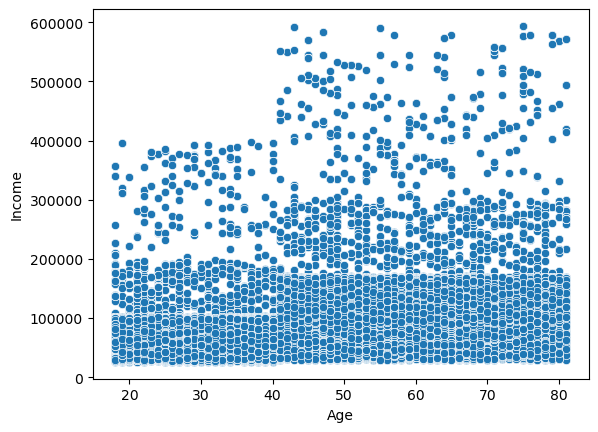

In [41]:
scatter = sns.scatterplot(x='Age', y='Income', data=df_age_income)

# Observation - Customers with ages below 40 have less income as compared to ages above 40 .


In [42]:
#Exporting Scatterplot showing correlation between age and income

scatter.figure.savefig(os.path.join(path,'04_Analysis','Visualizations','Scatterplot_age_income.png'))